# PS.1 (conditioning)

Consider subtraction and division as bivariate functions, i.e., 

\begin{align*}
f & :\mathbb{R}^2\rightarrow \mathbb{R} & (x_1,x_2)&\mapsto x_1-x_2\\
g & :\mathbb{R}\times \mathbb{R}_*\rightarrow \mathbb{R} & (x_1,x_2)&\mapsto \frac{x_1}{x_2}
\end{align*}

a) Determine the conditioning of $f$ with respect to the sum norm. 

b) Determine the partial conditioning of $f$. 

c) Is $g$ partially well-conditioned?

## Solution
a) Absolute and relative conditioning are
\begin{equation*}
\kappa^{abs}_f(x_1,x_2) = \|f'(x_1,x_2)\|_1 = \|(1, -1)\|_1 = 1, \qquad \kappa_f(x_1,x_2) = \frac{\|(x_1,x_2)^\top\|_1}{|x_1-x_2|}= \frac{|x_1|+|x_2|}{|x_1-x_2|}.
\end{equation*}
Subtraction is ill-conditioned for $x_1\approx x_2$.

b) The partial conditioning is
\begin{align*}
\hat{\kappa}_f(x_1,x_2)& = \hat{\kappa}^1_f(x_1,x_2)+\hat{\kappa}^2_f(x_1,x_2) \\
& = |\partial_1 f(x_1,x_2)|\frac{|x_1|}{|x_1-x_2|}+|\partial_2 f(x_1,x_2)|\frac{|x_2|}{|x_1-x_2|}\\
& = \frac{|x_1|+|x_2|}{|x_1-x_2|}
\end{align*}

c) The division is partially well-conditioned because
\begin{equation*}
\hat{\kappa}^1_g(x_1,x_2)= \frac{1}{|x_2|}\cdot \frac{|x_1|}{|x_1|/|x_2|} = 1,\qquad \hat{\kappa}^2_g(x_1,x_2)= \frac{|x_1|}{|x_2|^2}\cdot \frac{|x_2|}{|x_1|/|x_2|} = 1,\qquad \hat{\kappa}_g(x_1,x_2)=2.
\end{equation*}


# PS.1 (evaluating polynomials)

We are given the polynomial 

\begin{equation*}
f(x,y) = 4x^4 - y^4 + 2y^2
\end{equation*}

a) Evaluate $f$ at $(x,y)=(13860.0,19601.0) $  in julia. 

b) There could be rounding errors. What is the exact value of $f(13860.0,19601.0)$? 

c) Provide a lower bound on $\hat{\kappa}_f(13860,19601)$.

In [1]:
f(x,y) = 4x^4-y^4+2y^2
x = 13860.0
y = 19601.0
f(x,y)

2.0

In [2]:
f(13860,19601)   # integer arithmetic is exact (we stay in the range of Int64)

1

c) The partial conditioning satisfies
\begin{align*}
\hat{\kappa}_f(x,y) = |16 x^3|\frac{|x|}{|f(x,y)|} + |4y-4y^3|\frac{|y|}{f(x,y)} = 16 x^4 +|4y^2-4y^4| \geq x^4 \geq 10^{16}.
\end{align*}

# PS.1 (ill-conditioned deblurring) 

For $x\in\mathbb{R}^n$, you only observe 
\begin{equation*}
y = A x,\qquad A=\frac{1}{9}\begin{pmatrix}
3&2 &1 &0&\cdots&0\\
2&3&\ddots&\ddots&&\vdots\\
1&\ddots&\ddots&\ddots&\ddots&0\\
0&\ddots&\ddots&\ddots&\ddots&1\\
\vdots & &\ddots&\ddots&3&2\\
0 &\cdots &0&1&2&3
\end{pmatrix}.
\end{equation*}

a) Write a function constr_A(n) that builds $A$ provided that $n\geq 5$.

b) For fixed $n$ and a suitable signal $x\in\mathbb{R}^n$, compute $A$ and plot $y=A x$.

c) Add independent, identically distributed Gaussian noise $\varepsilon\in\mathbb{R}^n$ to $y$, i.e.,
$$
\tilde{y} = y+\varepsilon
$$
and reconstruct $A^{-1}\tilde{y}$. Plot $A^{-1}y$ and $A^{-1}\tilde{y}$ for different noise intensities.

d) Plot $\|A^{-1}\|_1$ against $n$ for $5\leq n\leq 100$.

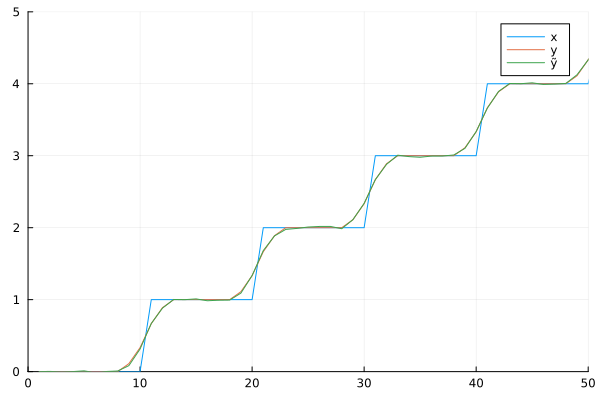

In [2]:
using Plots, Random, LaTeXStrings

function constr_A(n)
    A = zeros(n,n)
    A[1,1:3] = [3 2 1]
    A[2,1:4] = [2 3 2 1]
    for k in 3:n-2
        A[k,k-2:k+2] = [1 2 3 2 1]
    end
    A[n-1,n-3:n] = [1 2 3 2] 
    A[n,n-2:n] = [1 2 3]
    return 1/9*A
end

n = 1000
A = constr_A(n)
x = floor.(range(0,n/10,n))

y = A*x
Random.seed!(1)      # can be omitted, just for reproducibility
ε = 0.01*randn(n)
ỹ = y + ε

plot(x,label="x",xlimits=[0;50],ylimits=[0;5])
plot!(y,label="y",xlimits=[0;50],ylimits=[0;5])
plot!(ỹ,label="ỹ")

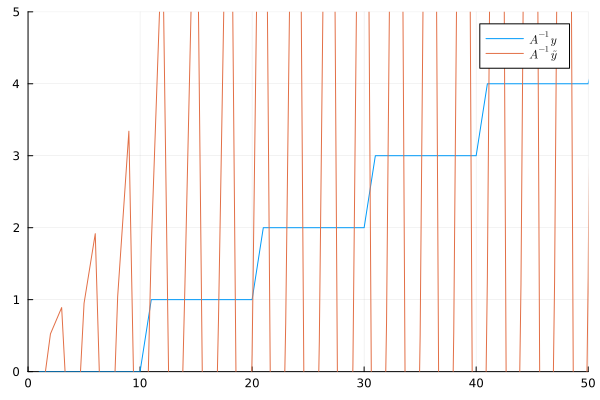

In [3]:
invA = inv(A)
plot(invA*y,label=L"A^{-1}y",xlimits=[0;50],ylimits=[0;5])
plot!(invA*ỹ,label=L"A^{-1}\tilde{y}",xlimits=[0;50],ylimits=[0;5])

# PS.1 ($32$-bit system)
    
Consider the following $32$-bit System: 

- sign: $1$ bit

- exponent: $8$ bits

- significant digits: $23$ bits


a) Determine $\mathbb{F}_{32}$, $\mathbb{F}_{32,sub}$, $r_{32}$, and $R_{32}$.

b) Provide $3$ positive integers that are smaller than $R_{32}$ but not contained in $\mathbb{F}_{32}$. 

c) Illustrate and verify your theoretical findings in a) and b) by julia.

## Solution

a) The floating point numbers (for the $32$-bit IEEE standard) are
\begin{equation*}
\mathbb{F}_{32} = \bigcup_{\alpha=-126}^{127} \{2^\alpha(1+k2^{-23}) : k=0,1,\ldots,2^{23}-1\},
\end{equation*}
which leads to 
\begin{align*}
R_{32} = 2^{127}(1+1-2^{-23})=2^{128}(1-2^{-24}),
\qquad\qquad
r_{32}=2^{-126}.
\end{align*}
The subnormal floating point numbers in $32$ bit are
\begin{equation*}
\mathbb{F}_{32,sub}=\{\pm k 2^{-149} : k=1,\ldots,2^{23}-1\},\qquad\qquad Float32 = \mathbb{F}_{32}\cup\mathbb{F}_{32,sub} \cup \{\pm \infty,NaN\}
\end{equation*}

b) For $\alpha=24$, we have $2^{24}(1+k2^{-23})=2^{24}+k2$, so that $2^{24}+1,2^{24}+3,2^{24}+5\not\in Float32$.

In [5]:
a = Float32(3)
typeof(a) 
n = 0:5
f(n) = Float32(2^24) + n
@show f(0)==f(1)
@show f(1)==f(2)
@show f(2)==f(3)
@show f(3)==f(4)
@show f(4)==f(5)

f(0) == f(1) = true
f(1) == f(2) = false
f(2) == f(3) = false
f(3) == f(4) = true
f(4) == f(5) = true


true

In [6]:
x = Float32(2.0^127*(2-2^(-23)))

Sign = 1
exponent = (2:9)
mantisse = (10:32)
println(bitstring(x)[Sign])
println(bitstring(x)[exponent])
println(bitstring(x)[mantisse])

0
11111110
11111111111111111111111


In [7]:
y = x+Float32(2.0^102)
println(bitstring(y)[Sign])
println(bitstring(y)[exponent])
println(bitstring(y)[mantisse])

0
11111110
11111111111111111111111


In [8]:
x+Float32(2.0^103)

Inf32

In [9]:
nextfloat(Float32(0.0)) == 2^-149

true

In [10]:
Float32(2.0^-150) == 0

true